In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

## PRN : ___________________________________
## Name: ___________________________________

# Analytics and Statistics using Python
## A15: Statistical Measures : Lab assignment
- Basics of Statistics
- Statistical Analytics
- Descriptive Statistical Measures
- Statistics - Central Tendency & Dispersion (Mean, Median, Mode, Quartiles,
- Percentiles, Range, Interquartile Range, Standard Deviation, Variance, and
Coefficient of Variation)
### Lab Assignments:
- Load any dataset and find out the mean, median, mode and other central
tendencies of the dataset.

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

## Practice Exercise:
Load Students' performance data using Python's NumPy and Pandas. Create frequency distributions for categorical variables using Pandas.

In [2]:
###------------------
### Import Statements
###------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
### end of import statements

c:\Users\PRIYANKA\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 2.1.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [2]:
# Load `StudentsPerformance.csv` and explore whats inside
data_df = pd.read_csv('./asp/StudentsPerformance.csv')
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Calculate Frequency Distribution for all categorical variable
cate_var = data_df.select_dtypes(include=['object', 'category']).columns
frequency_distribution = {}
for var in cate_var:
    frequency_distribution[var] = data_df[var].value_counts()

# To display the results
for var, freq in frequency_distribution.items():
    print(f"Frequency distribution for {var}:\n{freq}\n")




Frequency distribution for gender:
gender
female    518
male      482
Name: count, dtype: int64

Frequency distribution for race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Frequency distribution for parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Frequency distribution for lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64

Frequency distribution for test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64



#### Discussions:
- Discuss types of data (discrete, continuous).
- Discuss why we differentiate between population and sample in statistics.

### Statistical Analytics
#### Overview:
Focus on applying statistical methods to analyze and interpret datasets. This includes calculating important descriptive statistics.

- **Basic statistical analysis:** calculating measures of central tendency (mean, median, mode) and variability.
- Visualizing data distributions.
#### Exercise:
- Calculate summary statistics for a dataset using Pandas.
- Plot histograms to visualize distributions.

In [6]:
# Summary statistics for numerical variables
summary_data = data_df.describe()  #describe to collect data summary from csv file
print(summary_data)

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


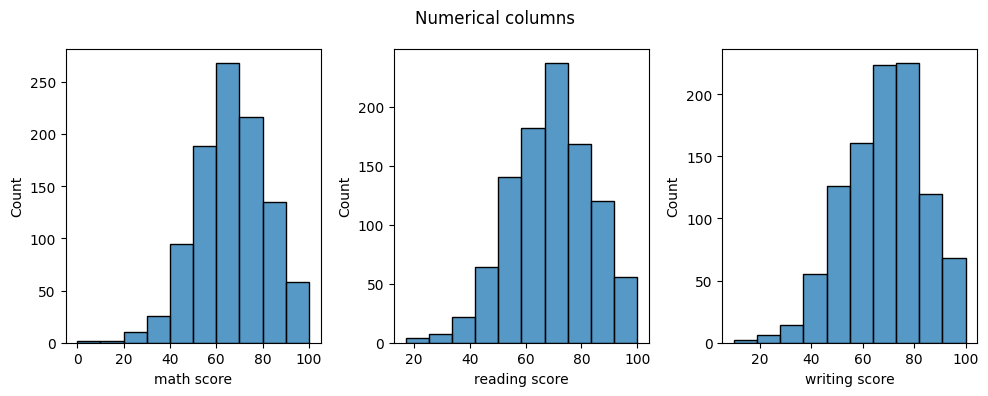

In [7]:
# Plot histogram of All three numerical variables
num_cols = ['math score','reading score','writing score']
fig,axes = plt.subplots(1,3,figsize=(10,4))

for count, col in enumerate(num_cols):
    ax = axes[count]
    sns.histplot(data=data_df,x = col,ax = ax,bins = 10)
fig.suptitle('Numerical columns')
plt.tight_layout()



### Descriptive Statistical Measures
Explore key measures like central tendency (mean, median, mode) and dispersion (range, variance, standard deviation).

- Measures of central tendency: mean, median, mode.
- Measures of dispersion: range, variance, standard deviation, and interquartile range (IQR).

#### Exercise:
- Calculate mean, median, and mode for a dataset.
- Calculate range, variance, and standard deviation.
- Calculate IQR for understanding data spread.

In [51]:

# Mean, Median, Mode 
#fig,axes = plt.subplots(1,3,figsize =(15,6))
num_cols = ['math score', 'reading score', 'writing score']
for count,cols in enumerate(num_cols):
    mean = data_df[cols].mean()
    median = data_df[cols].median()
    mode = data_df[cols].mode()[0]
   
print(f"{col} - Mean: {mean:.2f}, Median: {median:.2f}, Mode: {mode}")


parch - Mean: 68.05, Median: 69.00, Mode: 74


In [53]:
num_cols = ['math score', 'reading score', 'writing score']
#fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for count, col in enumerate(num_cols):

    range = data_df[col].max() - data_df[col].min()
    variance = data_df[col].var()
    std_dev = data_df[col].std()
    print(f"{col} - Range: {range}, Variance: {variance}, Standard Deviation: {std_dev}")



math score - Range: 100, Variance: 229.91899799799796, Standard Deviation: 15.16308009600945
reading score - Range: 83, Variance: 213.16560460460462, Standard Deviation: 14.600191937252216
writing score - Range: 90, Variance: 230.907991991992, Standard Deviation: 15.19565701086965


In [61]:
# IQR (Interquartile Range)
num_cols = ['math score', 'reading score', 'writing score']

out_list = []

for col in num_cols:
    # 1st Quartile
    Q1 = np.percentile(data_df[col], 25)

    # 3rd Quartile
    Q3 = np.percentile(data_df[col], 75)
    
    #range calculate
    ran = data_df[col].max() - data_df[col].min()

    # IQR
    IQR = Q3 - Q1
    
    # Append to the list
    out_list.append((col, Q1, Q3, IQR,ran))
    
    # Print IQR
    print(f"{col} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Range : {ran}")




math score - Q1: 57.0, Q3: 77.0, IQR: 20.0, Range : 100
reading score - Q1: 59.0, Q3: 79.0, IQR: 20.0, Range : 83
writing score - Q1: 57.75, Q3: 79.0, IQR: 21.25, Range : 90


### Central Tendency & Dispersion

Dive deeper into calculating and interpreting the central tendency (mean, median, mode) and measures of dispersion (range, variance, standard deviation, quartiles, percentiles).

#### Key Concepts:
- Central tendency: mean, median, mode.
- Dispersion: range, variance, standard deviation, interquartile range.
- Percentiles and Quartiles.
####  Exercise:
- Calculate quartiles and percentiles.
- Visualize quartiles using box plots.
- Compute the coefficient of variation to measure relative variability.

In [41]:
out_list = {}
for col in num_cols:
    Q1 = np.percentile(data_df[col], 25)
    Q2 = np.percentile(data_df[col], 50)  # Median
    Q3 = np.percentile(data_df[col], 75)
    out_list[col] = {'Q1': Q1, 'Q2': Q2, 'Q3': Q3}

# Print quartiles
for col, q in out_list.items():
    print(f"{col} - Q1: {q['Q1']}, Q2: {q['Q2']}, Q3: {q['Q3']}")


math score - Q1: 57.0, Q2: 66.0, Q3: 77.0
reading score - Q1: 59.0, Q2: 70.0, Q3: 79.0
writing score - Q1: 57.75, Q2: 69.0, Q3: 79.0


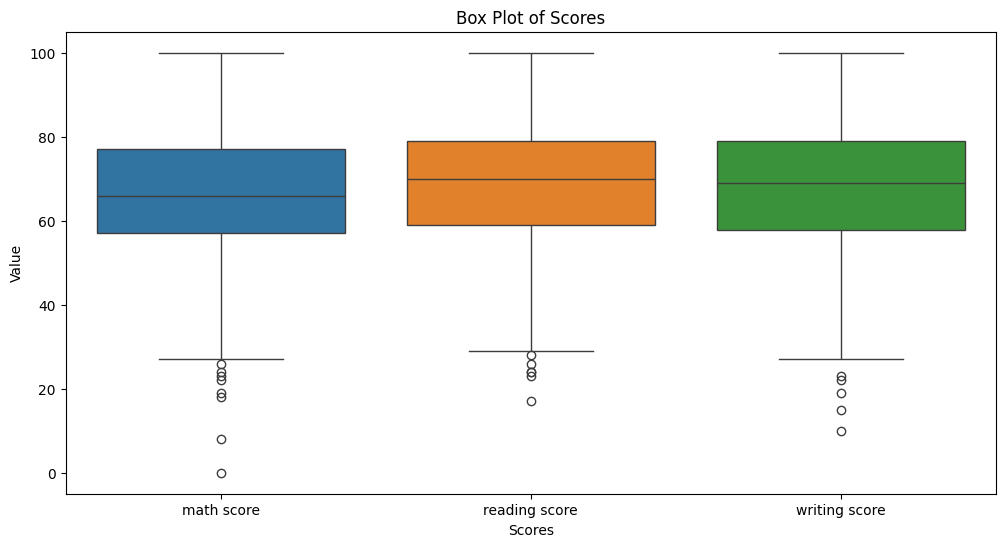

In [39]:
# Step 2: Visualize Quartiles Using Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_df)
plt.title('Box Plot of Scores')
plt.xlabel('Scores')
plt.ylabel('Value')
plt.xticks(ticks=np.arange(len(num_cols)), labels=num_cols)
plt.show()


In [42]:

# Coefficient of Variation (CV)
cv_results = {}

for col in num_cols:
    mean = data_df[col].mean()
    std_dev = data_df[col].std()
    cv = (std_dev / mean) * 100  # CV as a percentage
    cv_results[col] = cv
    print(f"{col} - Coefficient of Variation: {cv:.2f}%")

# Optional: Display CV results in a DataFrame
cv_df = pd.DataFrame(cv_results.items(), columns=['Column', 'Coefficient of Variation'])
print(cv_df)


math score - Coefficient of Variation: 22.94%
reading score - Coefficient of Variation: 21.11%
writing score - Coefficient of Variation: 22.33%
          Column  Coefficient of Variation
0     math score                 22.943425
1  reading score                 21.107999
2  writing score                 22.328823


### Practice more
- Load titanic dataset (titanic.csv) and repeat the above steps.

In [43]:
data1 = pd.read_csv('./asp/titanic.csv')
data1.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [44]:
cal = data1.select_dtypes(include = ['object','category']).columns
frequency = {}
for v1 in cal:
    frequency[v1] = data1[v1].value_counts()

for v1,f1 in frequency.items():
    print(f"frequency distribution for {v1}:\n{f1}\n")

frequency distribution for name:
name
Kelly, Mr. James                     2
Connolly, Miss. Kate                 2
Ilmakangas, Miss. Ida Livija         1
Ilieff, Mr. Ylio                     1
Ibrahim Shawah, Mr. Yousseff         1
                                    ..
Harris, Mr. George                   1
Harper, Rev. John                    1
Harper, Miss. Annie Jessie "Nina"    1
Harbeck, Mr. William H               1
Herman, Mr. Samuel                   1
Name: count, Length: 1307, dtype: int64

frequency distribution for sex:
sex
male      843
female    466
Name: count, dtype: int64

frequency distribution for ticket:
ticket
CA. 2343    11
1601         8
CA 2144      8
PC 17608     7
347082       7
            ..
3101281      1
347091       1
350043       1
347075       1
7546         1
Name: count, Length: 929, dtype: int64

frequency distribution for cabin:
cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F4                 4
         

In [45]:
summary = data1.describe()
print(summary)

            pclass          age        sibsp        parch         fare  \
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000   
mean      2.294882    29.881135     0.498854     0.385027    33.295479   
std       0.837836    14.413500     1.041658     0.865560    51.758668   
min       1.000000     0.166700     0.000000     0.000000     0.000000   
25%       2.000000    21.000000     0.000000     0.000000     7.895800   
50%       3.000000    28.000000     0.000000     0.000000    14.454200   
75%       3.000000    39.000000     1.000000     0.000000    31.275000   
max       3.000000    80.000000     8.000000     9.000000   512.329200   

          survived  
count  1309.000000  
mean      0.381971  
std       0.486055  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


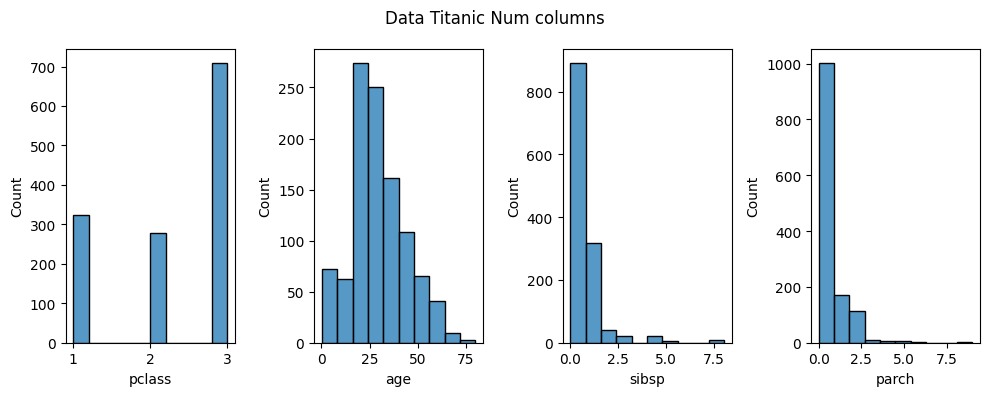

In [47]:
numCol = ['pclass','age','sibsp','parch']
fig,axes = plt.subplots(1,4,figsize=(10,4))

for count,col in enumerate(numCol):
    ax = axes[count]
    sns.histplot(data=data1,x = col,ax = ax,bins = 10)
fig.suptitle("Data Titanic Num columns")
plt.tight_layout()

In [55]:
numCol = ['pclass','age','sibsp','parch']
#fig,axes = plt.subplots(1,4,figsize=(10,4))
for count,col in enumerate(numCol):
    mean1 = data1[col].mean()
    median1 = data1[col].median()
    mode1 = data1[col].mode()[0]
    print(f"{col} - Mean: {mean1:.2f}, Median: {median1:.2f}, Mode: {mode1}")

pclass - Mean: 2.29, Median: 3.00, Mode: 3
age - Mean: 29.88, Median: 28.00, Mode: 24.0
sibsp - Mean: 0.50, Median: 0.00, Mode: 0
parch - Mean: 0.39, Median: 0.00, Mode: 0


In [57]:
for count,col in enumerate(numCol):
    range1 = data1[col].max() - data1[col].min()
    variance1 = data1[col].var()
    stdDev = data1[col].std()
    print(f"{col} - Range: {range1}, Variance: {variance1}, Standard Deviation: {stdDev}")

pclass - Range: 2, Variance: 0.7019691946837117, Standard Deviation: 0.8378360189701274
age - Range: 79.8333, Variance: 207.74897359969773, Standard Deviation: 14.413499699923602
sibsp - Range: 8, Variance: 1.0850522026992615, Standard Deviation: 1.041658390596102
parch - Range: 9, Variance: 0.7491945902631278, Standard Deviation: 0.8655602753495147


In [60]:
out_list = []
for col in numCol:
    q1 = np.percentile(data1[col],25)
    q3 = np.percentile(data1[col],75)
    ran = data1[col].max() - data1[col].min()
    
    IQR1 = q3 - q1
    out_list.append((col,q1,q3,IQR1,ran))
    
    print(f"{col} - Q1: {q1}, Q3 : {q3}, IQR: {IQR1},Range: {ran}")

pclass - Q1: 2.0, Q3 : 3.0, IQR: 1.0,Range: 2
age - Q1: nan, Q3 : nan, IQR: nan,Range: 79.8333
sibsp - Q1: 0.0, Q3 : 1.0, IQR: 1.0,Range: 8
parch - Q1: 0.0, Q3 : 0.0, IQR: 0.0,Range: 9
